<h1 style="color:#2bf0b5;"> <b>Neuroscience</b> HW3-2 - Lachin Naghashyar</h1>

---

<h2 style="color:#f06ff2;"> <b> Reinforcement Learning - Conditioning Paradigms </b></h2>

**Q1** Acquisition & Extinction Conditioning

We will have 100 trials of acquisition (with a reward value of 1) and 100 trials of extinction (with the reward = 0). Rescorla-Wagner Rule updates the weights using $\Delta w = \epsilon (r - v) u$ where $\epsilon$ is the learning rate and $r-v$ is the prediction error.

In [51]:
from matplotlib import pyplot as plt

import numpy as np


def acquisition_extinction(epsilon, initial_w, acq_r, ex_r):
    w = np.zeros((200, 1))
    # in all the 200 trials, we have the same stimuli = 1
    w[0] = initial_w
    for i in range(100):
        v = w[i-1] * 1 # v = w u
        w[i] = w[i-1] +  epsilon * (acq_r - v) * 1

    for i in range(100, 200):
        v = w[i-1] * 1 # v = w u
        w[i] = w[i-1] +  epsilon * (ex_r - v) * 1

    plt.plot(np.linspace(0, 199, num=200), w)
    plt.xlabel('trial number')
    plt.ylabel('w')
    plt.suptitle('Evolution of the weight w over 200 trials in Acquisition & Extinction Conditioning')
    plt.show()


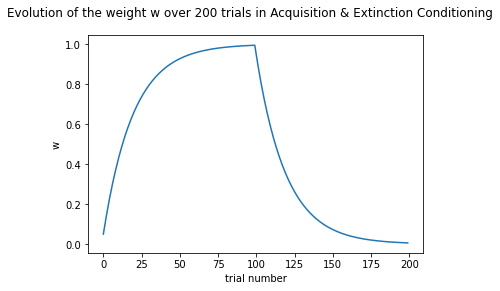

In [52]:
acquisition_extinction(0.05, 0, 1, 0)

**Q2** Partial Conditioning

In this paradigm, with the probability of $\alpha$ we will have a stimuli with a reward amount of 1 and reward is paired with stimulus randomly on $\alpha$ * 100  percent of the  of trials.



In [53]:
import random

def partial(alpha, initial_w, r, epsilon):
    w = np.zeros((200, 1))
    # in all the 200 trials, we have the same stimuli = 1
    w[0] = initial_w
    for i in range(1, 200):
        v = w[i-1] * 1 # v = w u
        if random.random() < alpha:
            w[i] = w[i-1] +  epsilon * (r - v) * 1
        else:
            w[i] = w[i-1] +  epsilon * (0 - v) * 1

    plt.plot(np.linspace(0, 199, num=200), w)
    plt.xlabel('trial number')
    plt.ylabel('w')
    plt.suptitle('Evolution of the weight w over 200 trials in Partial Conditioning, alpha='+str(alpha)+' and r='+str(r))
    plt.show()
    return w[199]

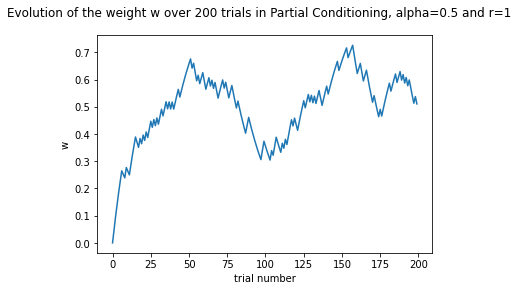

final w value after 200 trials with alpha being 0.5 :  [0.51077456]


In [54]:
w_final = partial(0.5, 0, 1, 0.05)
print('final w value after 200 trials with alpha being 0.5 : ' , str(w_final))

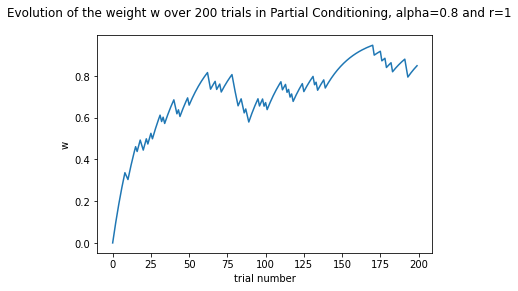

final w value after 200 trials with alpha being 0.8 :  [0.84927315]


In [55]:
w_final = partial(0.8, 0, 1, 0.05)
print('final w value after 200 trials with alpha being 0.8 : ' , str(w_final))

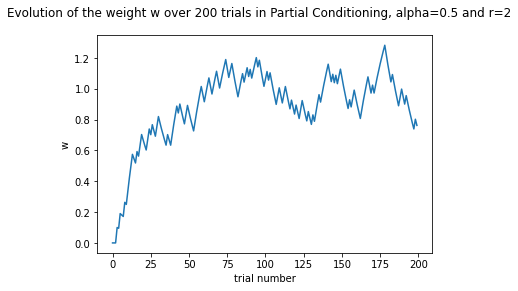

final w value after 200 trials with alpha being 0.5 and reward being 2  [0.76231843]


In [56]:
w_final = partial(0.5, 0, 2, 0.05)
print('final w value after 200 trials with alpha being 0.5 and reward being 2 ' , str(w_final))

from the figures above, we can conclude that in partial conditioning, the reward value converges to a value near $\alpha \times reward$. In partial conditioning, the response is reinforced only part of the time and with probability $\alpha$. Hence, by increasing $\alpha$, we acquire the simuli with reward most often and this increases the weights. Learned behaviors are acquired more slowly with partial reinforcement, but we can see that after a while, w starts to converge to a value which has a direct relation with $\alpha$ and $r$. As you can see, in the last one, since $r$ is larger, $w$ converges to larger values or approximately  double the previous value (since r is doubled).

**Q3**  Blocking Conditioning

In this conditioning, s stimulus $s_1$ is associated with a reward and then a second stimulus $s_2$ is present along with the first, in association with the same reward. When testing the effect of the second one, we see that response is evoked only by 1st stimulus, not the second one. In other words, $s_1$ stimulus which was pre-trained and has a wight of 1, blocks the new stimulus $s_2$ which has an initial weight of 1.

In [57]:
def blocking():
    w1 = np.zeros((200, 1))
    w2 = np.zeros((200, 1))
    w1[0] = 1
    for i in range(1, 200):
        v1 = w1[i-1] * 1 # v = w u
        v2 = w2[i-1] * 1
        v = v1 + v2
        w1[i] = w1[i-1] +  0.05 * (1 - v) * 1
        w2[i] = w2[i-1] +  0.05 * (1 - v) * 1


    plt.plot(np.linspace(0, 199, num=200), w1, 'r')
    plt.plot(np.linspace(0, 199, num=200), w2, 'b')
    plt.xlabel('trial number')
    plt.ylabel('w')
    plt.suptitle('Evolution of the weight w over 200 trials in blocking conditioning with red one corresponding to the weights of s1 and blue to s2')
    plt.show()

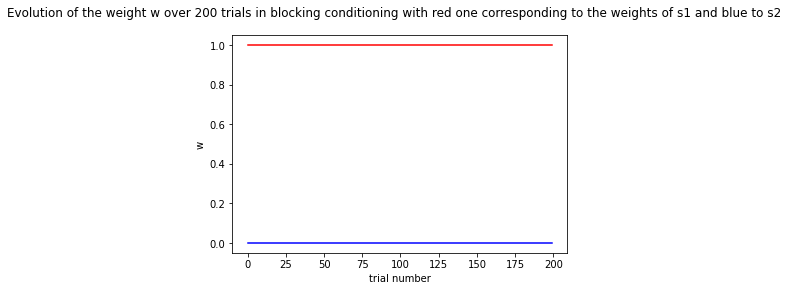

In [58]:
blocking()

As predicted, the weights don't get changed and stay at their previous values. Meaning the first one blocks the second one. Thia can also be seen from the equations, in each iteration, we have $v = w_1 u_1 + w_2 u_2$ and since $w_1 = 1$ and $w_2 = 0$, we will have $v = w_1 = 1$, using v to update $w_1$ and $w_2$, we end up with the same values, $\Delta w_1 = \Delta w_2 = \epsilon (r - v) u = \epsilon (1 - 1) u = 0$.

**Q4** Inhibitory Conditioning

having no pre-training, one stimulus is shown in conjunction with the reward. however, with an additional stimulus, the reward is not present anymore. This way, 2nd stimulus becomes a conditioned inhibitor, predicting the absence of reward.



In [59]:
def inhibitory():
    w1 = np.zeros((400, 1)) # s1
    w2 = np.zeros((400, 1)) # s1 + s2
    for i in range(1, 400):
        if random.random() < 0.5:
            v1 = w1[i-1] * 1 # v = w u
            v2 = w2[i-1] * 0
            v = v1 + v2
            w1[i] = w1[i-1] +  0.05 * (1 - v) * 1
            w2[i] = w2[i-1] +  0.05 * (1 - v) * 0
        else:
            v1 = w1[i-1] * 1 # v = w u
            v2 = w2[i-1] * 1
            v = v1 + v2
            w1[i] = w1[i-1] +  0.05 * (0 - v) * 1
            w2[i] = w2[i-1] +  0.05 * (0 - v) * 1

    plt.plot(np.linspace(0, 399, num=400), w1, 'r')
    plt.plot(np.linspace(0, 399, num=400), w2, 'b')
    plt.xlabel('trial number')
    plt.ylabel('w')
    plt.suptitle('Evolution of the weight w over 400 trials in inhibitory conditioning with red one corresponding to the weights of s1 and blue to s2')
    plt.show()

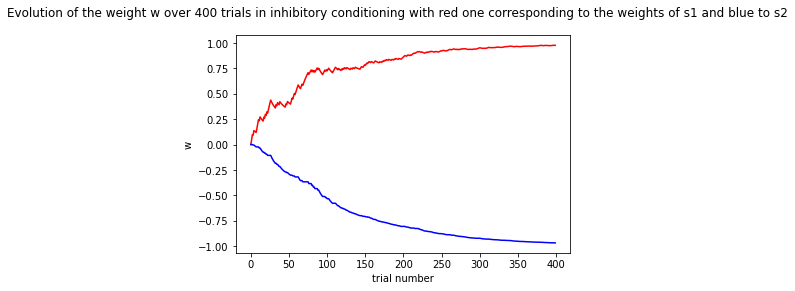

In [60]:
inhibitory()

As expected, the first stimulus gains a positive weight with converges to $r=1$ over time. Whereas the second one converges to a negative weight $-r = -1$. The reason for that is due to the net prediction of zero ($v = w_1 u_1 + w_2 u_2 = v - v = 0$) and this makes $w_2$ become negative.

**Q5** Overshadow Conditioning

2 stimuli are presented together during training and the prediction of reward is shared between them.
Trials are with both stimuli, and we have $v = w_1 + w_@ = r$. However, in this paradigm, the learning rates of these two stimuli might not be equal and take on values $\epsilon_1$ and $\epsilon_2$.

In [61]:
def overshadow(epsilon1, epsilon2):
    w1 = np.zeros((200, 1)) # s1
    w2 = np.zeros((200, 1)) # s1 + s2
    for i in range(1, 200):
        v1 = w1[i-1] * 1 # v = w u
        v2 = w2[i-1] * 1
        v = v1 + v2
        w1[i] = w1[i-1] +  epsilon1 * (1 - v) * 1
        w2[i] = w2[i-1] +  epsilon2 * (1 - v) * 1

    plt.plot(np.linspace(0, 199, num=200), w1, 'r')
    plt.plot(np.linspace(0, 199, num=200), w2, 'b')
    plt.xlabel('trial number')
    plt.ylabel('w')
    plt.suptitle('Evolution of the weight w over 200 trials in overshadow conditioning with red one corresponding to the weights of s1 and blue to s2')
    plt.show()

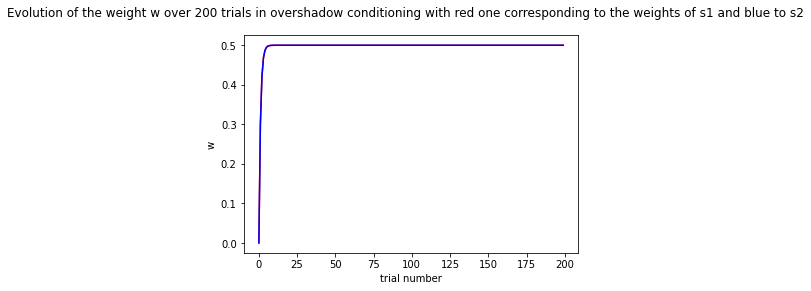

In [62]:
overshadow(0.3, 0.3)

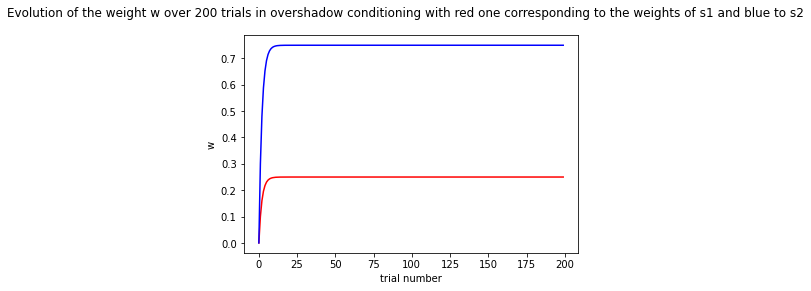

In [63]:
overshadow(0.1, 0.3)

As you can see, the one with much larger learning rate $(\epsilon)$ is more prominent and has larger weights and the weights grow faster. Also, when the learning rates are equal, the computations are exactly the same. Hence, the weight vectors become the same and fall on the same curve.